In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from ggplot import *

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
df = pd.read_csv("../input/Kaggle_Training_Dataset_v2.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(1687861, 23)

In [4]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [5]:
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sku,1687861,1687861,3270986,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
national_inv,1.68786e+06,NaN,NaN,NaN,496.112,29615.2,-27256,4,15,80,1.23344e+07
lead_time,1.58697e+06,NaN,NaN,NaN,7.87227,7.05602,0,4,8,9,52
in_transit_qty,1.68786e+06,NaN,NaN,NaN,44.052,1342.74,0,0,0,0,489408
forecast_3_month,1.68786e+06,NaN,NaN,NaN,178.119,5026.55,0,0,0,4,1.42761e+06
forecast_6_month,1.68786e+06,NaN,NaN,NaN,344.987,9795.15,0,0,0,12,2.46136e+06
forecast_9_month,1.68786e+06,NaN,NaN,NaN,506.364,14378.9,0,0,0,20,3.7773e+06
sales_1_month,1.68786e+06,NaN,NaN,NaN,55.9261,1928.2,0,0,0,4,741774
sales_3_month,1.68786e+06,NaN,NaN,NaN,175.026,5192.38,0,0,1,15,1.10548e+06
sales_6_month,1.68786e+06,NaN,NaN,NaN,341.729,9613.17,0,0,2,31,2.14662e+06


In [6]:
#drop NaN
df= df.dropna(axis=0)

In [7]:
#change last 6 columns to code, yes=1 and no =0
list = ['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop', 'went_on_backorder']
for col in list:
    df[col] = df[col].apply(lambda x: "1" if x=="Yes" else "0")


In [8]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,1,0,1,1,0,0
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0


**Create a faceted plot in ggplot of a public data set use size, shape and color as well as facets.**

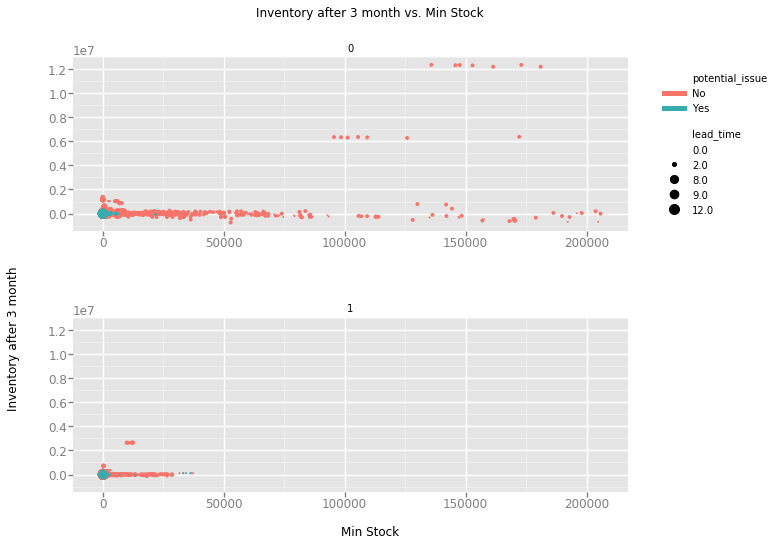

<ggplot: (-9223363261334937035)>

In [9]:
#ggplot
df['inv_3month']= df['national_inv']+df['in_transit_qty']-df['forecast_3_month']

p = ggplot(df,aes(x='min_bank' , y='inv_3month',color='potential_issue',size='lead_time')) + geom_point()
p + xlab('Min Stock') + ylab('Inventory after 3 month') + ggtitle('Inventory after 3 month vs. Min Stock')+ facet_wrap('ppap_risk')

**Create a Correlation Heatmap in Seaborn using a public dataset.**

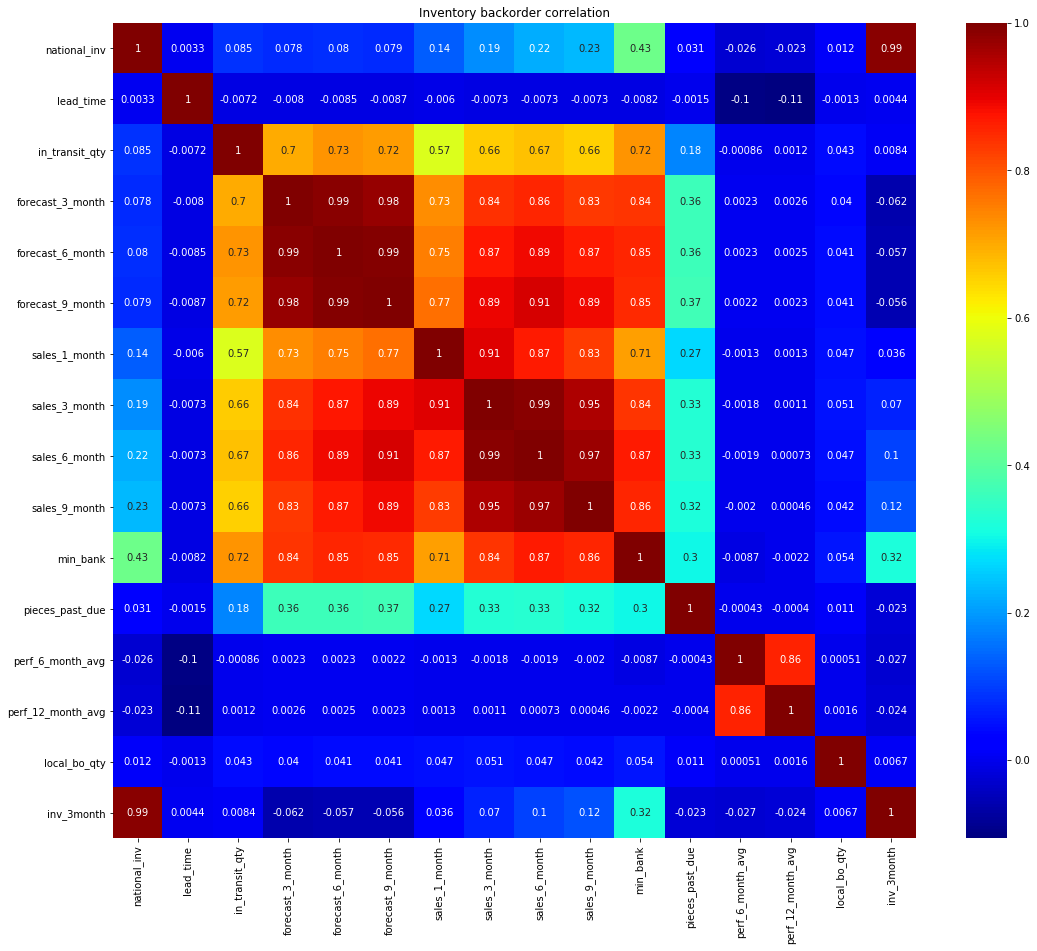

In [10]:
#corr heatmap
fig, axis1 = plt.subplots(1,1,figsize=(18,15))
plt.title('Inventory backorder correlation')
correlation = df.corr()
sns.heatmap(correlation,cmap="jet", annot=True)

**Create your own Test and Training sets using a public dataset.**

In [12]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-2].values, df.iloc[:, -2].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y,random_state=0)

In [13]:
X_train.shape

(1269573, 22)

In [14]:
X_test.shape

(317394, 22)

In [15]:
y_train.shape

(1269573,)

In [16]:
y_test.shape

(317394,)